Upload imdb_master_cleaned.csv file


Saving imdb_master_cleaned.csv to imdb_master_cleaned.csv


<ipython-input-1-d9445b970264>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


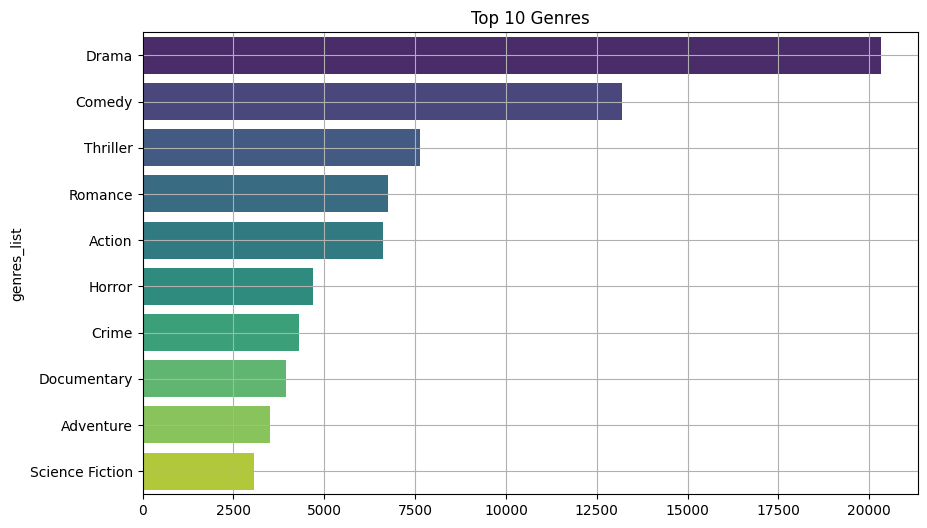

<ipython-input-1-d9445b970264>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_revenue.values, y=director_revenue.index, palette='rocket')


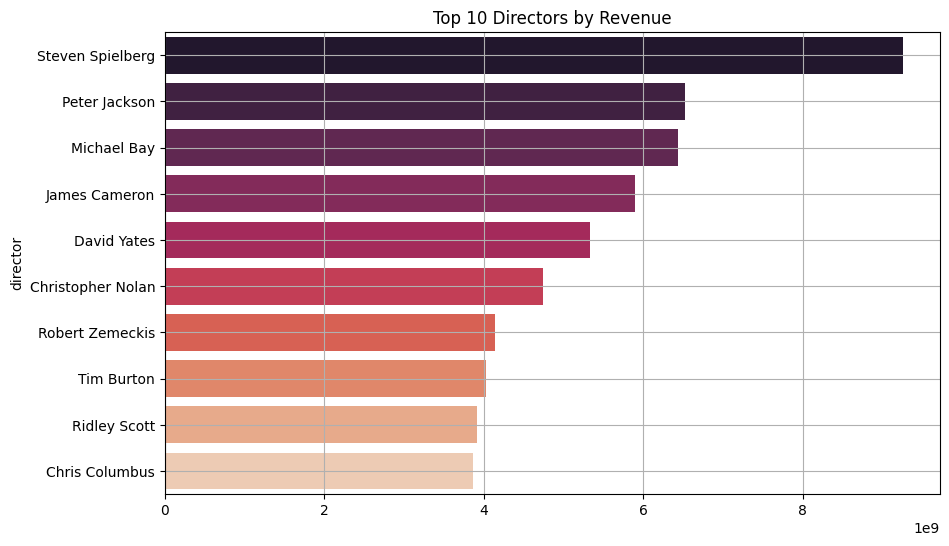

<ipython-input-1-d9445b970264>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_revenue.values, y=actor_revenue.index, palette='mako')


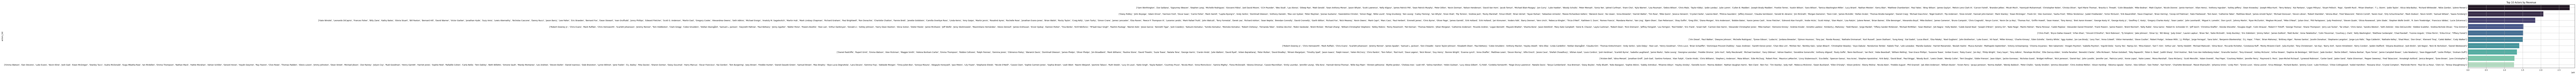

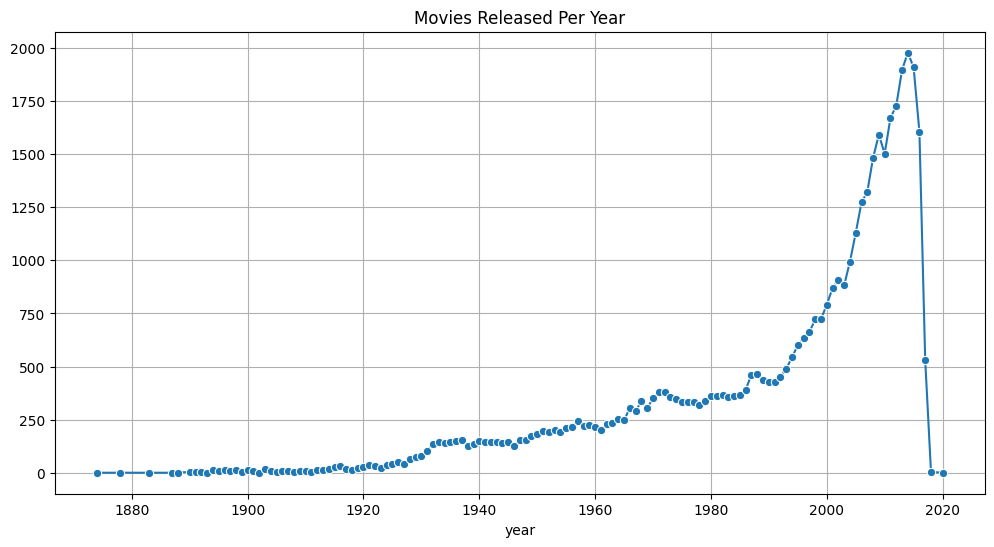

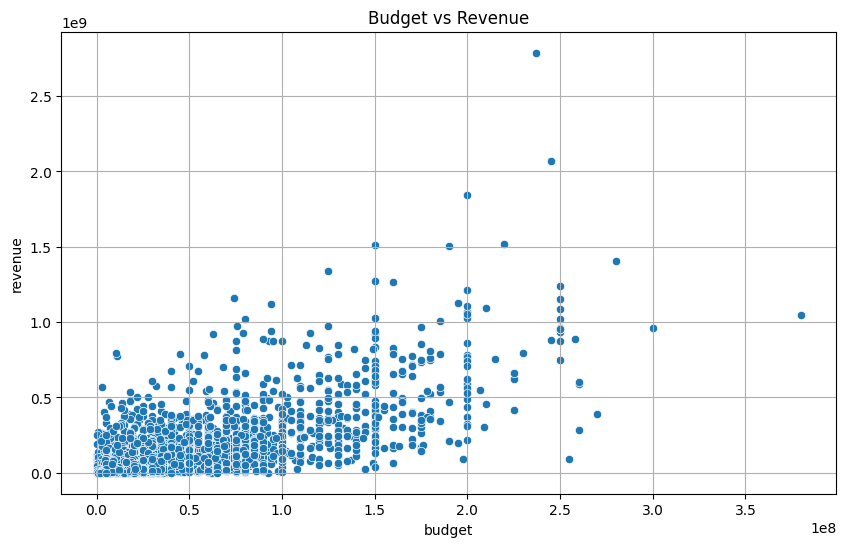

In [1]:
# 📊 VISUALIZATION NOTEBOOK DISHKIYAAOON

import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# ✅ Upload master file
print("Upload imdb_master_cleaned.csv file")
uploaded = files.upload()
master_file = list(uploaded.keys())[0]
final_df = pd.read_csv(master_file)

# ✅ Data cleaning
final_df['budget'] = pd.to_numeric(final_df['budget'], errors='coerce')
final_df['revenue'] = pd.to_numeric(final_df['revenue'], errors='coerce')
final_df['release_date'] = pd.to_datetime(final_df['release_date'], errors='coerce')
final_df['year'] = final_df['release_date'].dt.year

# ✅ Parse genres
def parse_genres(genres_json):
    try:
        genres = ast.literal_eval(genres_json)
        return [genre['name'] for genre in genres]
    except:
        return []
final_df['genres_list'] = final_df['genres'].apply(parse_genres)
exploded_genres_df = final_df.explode('genres_list')

# ✅ Genres Plot
genre_counts = exploded_genres_df['genres_list'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title("Top 10 Genres")
plt.grid(True)
plt.show()

# ✅ Directors Plot
valid_directors = final_df[(final_df['revenue'] > 0) & (final_df['director'].notnull())]
director_revenue = valid_directors.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=director_revenue.values, y=director_revenue.index, palette='rocket')
plt.title("Top 10 Directors by Revenue")
plt.grid(True)
plt.show()

# ✅ Actors Plot
exploded_actors_df = final_df.explode('actors_list')
valid_actors = exploded_actors_df[(exploded_actors_df['revenue'] > 0) & (exploded_actors_df['actors_list'].notnull())]
actor_revenue = valid_actors.groupby('actors_list')['revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=actor_revenue.values, y=actor_revenue.index, palette='mako')
plt.title("Top 10 Actors by Revenue")
plt.grid(True)
plt.show()

# ✅ Yearly Trend
movies_per_year = final_df['year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o')
plt.title("Movies Released Per Year")
plt.grid(True)
plt.show()

# ✅ Budget vs Revenue Scatter
valid_financials = final_df[(final_df['budget'] > 0) & (final_df['revenue'] > 0)]
plt.figure(figsize=(10,6))
sns.scatterplot(data=valid_financials, x='budget', y='revenue')
plt.title("Budget vs Revenue")
plt.grid(True)
plt.show()
